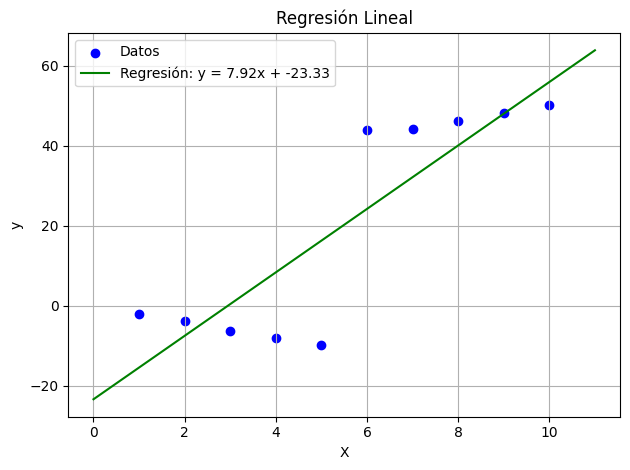

(None, 'y = 7.92x + -23.33')

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

y = [-2.1, -3.9, -6.2, -8.1,-9.9, 44, 44.1, 46.2, 48.2, 50.1]

# Nuevos datos con una relación más clara
X_new = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y_new = np.array(y)

# Ajustar nuevo modelo
model_new = LinearRegression()
model_new.fit(X_new, y_new)

# Nuevos parámetros
slope_new = model_new.coef_[0]
intercept_new = model_new.intercept_

# Ecuación de la nueva recta
regression_equation_new = f"y = {slope_new:.2f}x + {intercept_new:.2f}"

# Gráfico
X_fit_new = np.linspace(0, 11, 100).reshape(-1, 1)
y_fit_new = model_new.predict(X_fit_new)

plt.scatter(X_new, y_new, color='blue', label='Datos')
plt.plot(X_fit_new, y_fit_new, color='green', label=f'Regresión: {regression_equation_new}')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Regresión Lineal")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show(), regression_equation_new



In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predicciones del modelo
y_pred = model_new.predict(X_new)

# Cálculo de errores
mse = mean_squared_error(y_new, y_pred)
mae = mean_absolute_error(y_new, y_pred)
r2 = r2_score(y_new, y_pred)

{
    "Error cuadrático medio (MSE)": mse,
    "Error absoluto medio (MAE)": mae,
    "Coeficiente de determinación (R^2)": r2
}


{'Error cuadrático medio (MSE)': np.float64(179.70918787878787),
 'Error absoluto medio (MAE)': np.float64(11.011999999999999),
 'Coeficiente de determinación (R^2)': 0.7423008420340647}

In [52]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Datos
X_full = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]).reshape(-1, 1)
y_full = np.array(y)

# Partición
mid = len(X_full) // 2
X_first, y_first = X_full[:mid], y_full[:mid]    # 1-5
X_second, y_second = X_full[mid:], y_full[mid:]  # 6-10

# ===== 1) Modelo A con primera mitad (analítico) =====
X1_design = np.column_stack([np.ones_like(X_first), X_first])
theta_A = np.linalg.inv(X1_design.T @ X1_design) @ X1_design.T @ y_first
theta0_A, theta1_A = theta_A

# ===== 2) Modelo B (GD) sobre segunda mitad =====
X2_design = np.column_stack([np.ones_like(X_second), X_second])
theta_B = theta_A.copy()

lr = 0.01
n_iter = 2000
m = len(y_second)

for _ in range(n_iter):
    y_pred = X2_design @ theta_B
    grad = (2/m) * (X2_design.T @ (y_pred - y_second))
    theta_B -= lr * grad

theta0_B, theta1_B = theta_B

# ===== 3) Métricas =====
def metrics(X_design, y_true, theta):
    y_hat = X_design @ theta
    return mean_squared_error(y_true, y_hat), mean_absolute_error(y_true, y_hat), r2_score(y_true, y_hat)

mse_second, mae_second, r2_second = metrics(X2_design, y_second, theta_B)

X_full_design = np.column_stack([np.ones_like(X_full), X_full])
mse_all, mae_all, r2_all = metrics(X_full_design, y_full, theta_B)

results = pd.DataFrame({
    "MSE":  [mse_second, mse_all],
    "MAE":  [mae_second, mae_all],
    "R²":   [r2_second,  r2_all]
}, index=["Segunda mitad (train)", "Todos los datos"])

# Intento mostrar con ace_tools; si falla, imprimimos
try:
    import ace_tools as tools
    tools.display_dataframe_to_user("Errores modelo B", results)
except ModuleNotFoundError:
    print("Resultados de error:")
    print(results)

params_output = {
    "Parámetros modelo A (inicial)": {"θ0": theta0_A, "θ1": theta1_A},
    "Parámetros modelo B (ajustado en segunda mitad)": {"θ0": theta0_B, "θ1": theta1_B}
}
params_output



Resultados de error:
                              MSE        MAE        R²
Segunda mitad (train)    3.238437   1.359803  0.420632
Todos los datos        751.299686  19.739633 -0.077348


{'Parámetros modelo A (inicial)': {'θ0': np.float64(-0.10000000000000513),
  'θ1': np.float64(-1.9800000000000006)},
 'Parámetros modelo B (ajustado en segunda mitad)': {'θ0': np.float64(23.59231159265216),
  'θ1': np.float64(2.8290502388519716)}}

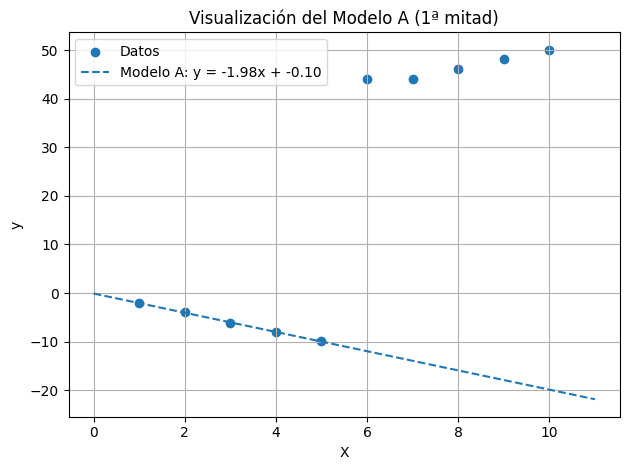

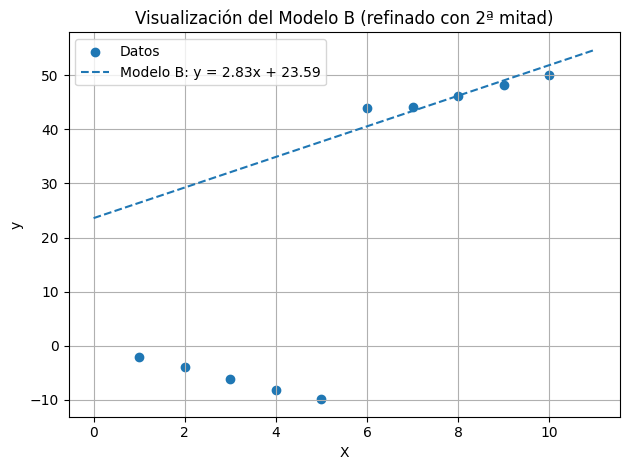

In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Datos completos
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array(y)


# Puntos para la recta
x_line = np.linspace(0, 11, 100)
y_line_A = theta1_A * x_line + theta0_A
y_line_B = theta1_B * x_line + theta0_B

# ======= Figura 1: Modelo A =======
plt.figure()
plt.scatter(X, y, label="Datos")
plt.plot(x_line, y_line_A, label=f"Modelo A: y = {theta1_A:.2f}x + {theta0_A:.2f}", linestyle="--")
plt.title("Visualización del Modelo A (1ª mitad)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ======= Figura 2: Modelo B =======
plt.figure()
plt.scatter(X, y, label="Datos")
plt.plot(x_line, y_line_B, label=f"Modelo B: y = {theta1_B:.2f}x + {theta0_B:.2f}", linestyle="--")
plt.title("Visualización del Modelo B (refinado con 2ª mitad)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
